In [262]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors,datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn import metrics
file_path = "/Users/aditsg/DataspellProjects/WaterPollution/Water_data_india.csv"
df=pd.read_csv(file_path,encoding="ISO-8859-1")

In [263]:
df.fillna(0, inplace=True)
df.head()

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),Nitrate,TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,5500,2014


In [264]:
df.dtypes

STATION CODE                      object
LOCATIONS                         object
STATE                             object
Temp                              object
D.O. (mg/l)                       object
PH                                object
CONDUCTIVITY (µmhos/cm)           object
B.O.D. (mg/l)                     object
Nitrate                           object
TOTAL COLIFORM (MPN/100ml)Mean    object
year                               int64
dtype: object

In [265]:
columns_to_convert = ['Temp', 'D.O. (mg/l)', 'PH', 'CONDUCTIVITY (µmhos/cm)',
                      'B.O.D. (mg/l)', 'Nitrate', 'TOTAL COLIFORM (MPN/100ml)Mean']

df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')
print(df.dtypes)

STATION CODE                       object
LOCATIONS                          object
STATE                              object
Temp                              float64
D.O. (mg/l)                       float64
PH                                float64
CONDUCTIVITY (µmhos/cm)           float64
B.O.D. (mg/l)                     float64
Nitrate                           float64
TOTAL COLIFORM (MPN/100ml)Mean    float64
year                                int64
dtype: object


In [266]:
start = 2
end = 1779
data = df.iloc[start:end, :]
print(data.head())

  STATION CODE                               LOCATIONS STATE  Temp  \
2         1475                     ZUARI AT PANCHAWADI   GOA  29.5   
3         3181             RIVER ZUARI AT BORIM BRIDGE   GOA  29.7   
4         3182            RIVER ZUARI AT MARCAIM JETTY   GOA  29.5   
5         1400  MANDOVI AT NEGHBOURHOOD OF PANAJI, GOA   GOA  30.0   
6         1476          MANDOVI AT TONCA, MARCELA, GOA   GOA  29.2   

   D.O. (mg/l)   PH  CONDUCTIVITY (µmhos/cm)  B.O.D. (mg/l)  Nitrate  \
2          6.3  6.9                    179.0            1.7      0.1   
3          5.8  6.9                     64.0            3.8      0.5   
4          5.8  7.3                     83.0            1.9      0.4   
5          5.5  7.4                     81.0            1.5      0.1   
6          6.1  6.7                    308.0            1.4      0.3   

   TOTAL COLIFORM (MPN/100ml)Mean  year  
2                          5330.0  2014  
3                          8443.0  2014  
4                   

In [267]:
data.columns = ['station', 'location', 'state', 'temp', 'do', 'ph', 'cond', 'bod', 'na', 'tc', 'year']

In [268]:
data['ndo'] = data['do'].apply(lambda x: (100 if (x >= 6)
                                          else(80 if (x >= 5)
                                               else(60 if (x >= 4)
                                                    else(40 if (x >= 3)
                                                         else 0)))))

/var/folders/_z/l9p6vnx965x6ccfll2y58x4r0000gn/T/ipykernel_39942/1809720734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ndo'] = data['do'].apply(lambda x: (100 if (x >= 6)


In [269]:
data['npH']=data.ph.apply(lambda x: (100 if (8.5>=x>=7)
                                     else(80 if  (8.6>=x>=8.5) or (6.9>=x>=6.8)
                                          else(60 if (8.8>=x>=8.6) or (6.8>=x>=6.7)
                                               else(40 if (9>=x>=8.8) or (6.7>=x>=6.5)
                                                    else 0)))))

/var/folders/_z/l9p6vnx965x6ccfll2y58x4r0000gn/T/ipykernel_39942/1394836008.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['npH']=data.ph.apply(lambda x: (100 if (8.5>=x>=7)


In [270]:
data['ncond'] = data.cond.apply(lambda x: (100 if (x <= 100)
                                                   else(80 if (x <= 200)
                                                        else(60 if (x <= 300)
                                                             else(40 if (x <= 400)
                                                                  else 0)))))

/var/folders/_z/l9p6vnx965x6ccfll2y58x4r0000gn/T/ipykernel_39942/3959961076.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ncond'] = data.cond.apply(lambda x: (100 if (x <= 100)


In [271]:
data['nbdo']=data.bod.apply(lambda x:(100 if (3>=x>=0)
                                      else(80 if  (6>=x>=3)
                                           else(60 if (80>=x>=6)
                                                else(40 if (125>=x>=80)
                                                     else 0)))))

/var/folders/_z/l9p6vnx965x6ccfll2y58x4r0000gn/T/ipykernel_39942/2059296379.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['nbdo']=data.bod.apply(lambda x:(100 if (3>=x>=0)


In [272]:
data['nna']=data.na.apply(lambda x:(100 if (20>=x>=0)
                                    else(80 if  (50>=x>=20)
                                         else(60 if (100>=x>=50)
                                              else(40 if (200>=x>=100)
                                                   else 0)))))

/var/folders/_z/l9p6vnx965x6ccfll2y58x4r0000gn/T/ipykernel_39942/1291374672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['nna']=data.na.apply(lambda x:(100 if (20>=x>=0)


In [273]:
data['nco']=data.tc.apply(lambda x:(100 if (5>=x>=0)
                                    else(80 if  (50>=x>=5)
                                         else(60 if (500>=x>=50)
                                              else(40 if (10000>=x>=500)
                                                   else 0)))))

/var/folders/_z/l9p6vnx965x6ccfll2y58x4r0000gn/T/ipykernel_39942/1845903784.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['nco']=data.tc.apply(lambda x:(100 if (5>=x>=0)


In [274]:
Si_values = {
    'Dissolved Oxygen': 10,
    'pH': 8.5,
    'Conductivity': 1000,
    'Biological Oxygen Demand': 5,
    'Nitrate': 45,
    'Total Coliform': 1000
}

wi_values = {
    'Dissolved Oxygen': 0.2213,
    'pH': 0.2604,
    'Conductivity': 0.0022,
    'Biological Oxygen Demand': 0.4426,
    'Nitrate': 0.0492,
    'Total Coliform': 0.0022
}

Videal_values = {
    'Dissolved Oxygen': 14.6,
    'pH': 7.0,
    'Conductivity': 0,
    'Biological Oxygen Demand': 0,
    'Nitrate': 0,
    'Total Coliform': 0
}

In [275]:
Vi_values = {
    'Dissolved Oxygen': data['do'],
    'pH': data['ph'],
    'Conductivity': data['cond'],
    'Biological Oxygen Demand': data['bod'],
    'Nitrate': data['na'],
    'Total Coliform': data['tc']
}

In [276]:
qi_values = {}
for param, Vi in Vi_values.items():
    qi_values[param] = 100 * (Vi - Videal_values[param]) / (Si_values[param] - Videal_values[param])

qi_values

{'Dissolved Oxygen': 2       180.434783
 3       191.304348
 4       191.304348
 5       197.826087
 6       184.782609
            ...    
 1774    217.391304
 1775    126.086957
 1776    100.000000
 1777    121.739130
 1778    148.543478
 Name: do, Length: 1777, dtype: float64,
 'pH': 2        -6.666667
 3        -6.666667
 4        20.000000
 5        26.666667
 6       -20.000000
            ...    
 1774   -266.666667
 1775      0.000000
 1776      6.666667
 1777     20.000000
 1778     36.200000
 Name: ph, Length: 1777, dtype: float64,
 'Conductivity': 2       17.9
 3        6.4
 4        8.3
 5        8.1
 6       30.8
         ... 
 1774    35.0
 1775    17.2
 1776    15.0
 1777    15.8
 1778     NaN
 Name: cond, Length: 1777, dtype: float64,
 'Biological Oxygen Demand': 2        34.0
 3        76.0
 4        38.0
 5        30.0
 6        28.0
         ...  
 1774    124.0
 1775     32.0
 1776     20.0
 1777     36.0
 1778     10.0
 Name: bod, Length: 1777, dtype: float64,
 'Ni

In [277]:
# Calculate K (proportionality constant)
K = 1 / sum(Si_values.values())

# Calculate wi for each parameter
wi_values_calculated = {param: K / Si_values[param] for param in Si_values}


In [278]:
data['wph']=data.npH * 0.165
data['wdo']=data.ndo * 0.281
data['wbdo']=data.nbdo * 0.234
data['wcond']=data.ncond * 0.009
data['wna']=data.nna * 0.028
data['wco']=data.nco * 0.281
data['wqi']=data.wph+data.wdo+data.wbdo+data.wcond+data.wna+data.wco
data

/var/folders/_z/l9p6vnx965x6ccfll2y58x4r0000gn/T/ipykernel_39942/3572231752.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['wph']=data.npH * 0.165
/var/folders/_z/l9p6vnx965x6ccfll2y58x4r0000gn/T/ipykernel_39942/3572231752.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['wdo']=data.ndo * 0.281
/var/folders/_z/l9p6vnx965x6ccfll2y58x4r0000gn/T/ipykernel_39942/3572231752.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

,station,location,state,temp,do,ph,cond,bod,na,tc,...,nbdo,nna,nco,wph,wdo,wbdo,wcond,wna,wco,wqi
2,1475,ZUARI AT PANCHAWADI,GOA,29.500,6.300,6.900,179.0,1.7,0.1,5330.0,...,100,100,40,13.2,28.10,23.40,0.72,2.8,11.24,79.46
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.700,5.800,6.900,64.0,3.8,0.5,8443.0,...,80,100,40,13.2,22.48,18.72,0.90,2.8,11.24,69.34
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.500,5.800,7.300,83.0,1.9,0.4,5500.0,...,100,100,40,16.5,22.48,23.40,0.90,2.8,11.24,77.32
5,1400,"MANDOVI AT NEGHBOURHOOD OF PANAJI, GOA",GOA,30.000,5.500,7.400,81.0,1.5,0.1,4049.0,...,100,100,40,16.5,22.48,23.40,0.90,2.8,11.24,77.32
6,1476,"MANDOVI AT TONCA, MARCELA, GOA",GOA,29.200,6.100,6.700,308.0,1.4,0.3,5672.0,...,100,100,40,9.9,28.10,23.40,0.36,2.8,11.24,75.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1774,1428,"KHARKHLA NEAR SUTNGA KHLIERIAT,JAINTIA HILLS D...",NAN,15.000,4.600,3.000,350.0,6.2,2.2,49.0,...,60,100,80,0.0,16.86,14.04,0.36,2.8,22.48,56.54
1775,1631,"MYNTDU RIVER JOWAI, MEGHALAYA",NAN,10.000,8.800,7.000,172.0,1.6,5.0,2800.0,...,100,100,40,16.5,28.10,23.40,0.72,2.8,11.24,82.76
1776,1632,"GANOL RIVER TURA, MEGHALAYA",NAN,11.000,10.000,7.100,150.0,1.0,4.0,350.0,...,100,100,60,16.5,28.10,23.40,0.72,2.8,16.86,88.38
1777,1633,"SIMSANG RIVER WILLIAMNAGAR, MEGHALAYA",NAN,12.000,9.000,7.300,158.0,1.8,7.2,280.0,...,100,100,60,16.5,28.10,23.40,0.72,2.8,16.86,88.38


In [279]:
#calculation overall wqi for each year
gy=data.groupby('year')['wqi'].mean()
gy

year
2006    71.717059
2007    72.597000
2008    72.725660
2009    74.218895
2010    74.743723
2011    75.820693
2012    79.078425
2013    75.167433
2014    77.049136
Name: wqi, dtype: float64

In [280]:
data=gy.reset_index(level=0,inplace=False)
data

,year,wqi
0,2006,71.717059
1,2007,72.597000
2,2008,72.725660
3,2009,74.218895
4,2010,74.743723
5,2011,75.820693
6,2012,79.078425
7,2013,75.167433
8,2014,77.049136


In [281]:
data = data[np.isfinite(data['wqi'])]
data.head()

,year,wqi
0,2006,71.717059
1,2007,72.597000
2,2008,72.725660
3,2009,74.218895
4,2010,74.743723


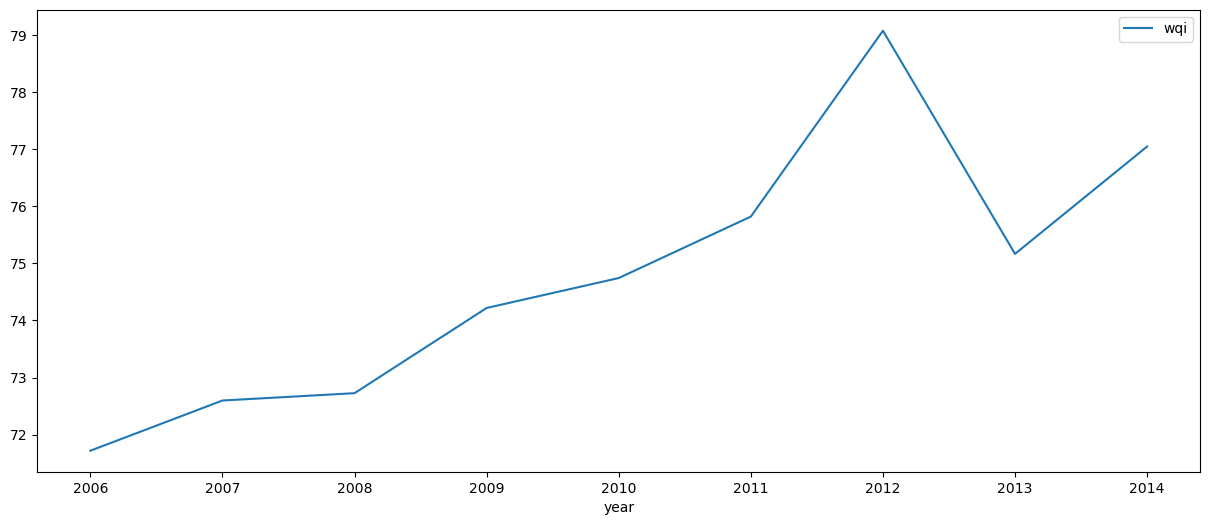

In [282]:
data=data.set_index('year')
data.plot(figsize=(15,6))
plt.show()

In [283]:
data=data.reset_index(level=0,inplace=False)

In [284]:
cols =['year']
y = data['wqi']
x=data[cols]
reg=linear_model.LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [285]:
reg.fit(x_train,y_train)
a=reg.predict(x_test)

In [286]:
y_test

3    74.218895
4    74.743723
Name: wqi, dtype: float64

In [287]:
print('mse:%.2f'%mean_squared_error(y_test,a))

mse:0.01


In [288]:
dt = pd.DataFrame({'Actual': y_test, 'Predicted': a})
x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x]

In [294]:
alpha = 0.1
iters = 3000
ys = y.size
np.random.seed(4)
tht = np.random.rand(2)

def gradient_descent(x, y, tht, iters, alpha):
    past_costs = []
    past_thts = [tht]
    for i in range(iters):
        prediction = np.dot(x, tht)
        error = prediction - y
        cost = 1/(2*ys) * np.dot(error.T, error)
        past_costs.append(cost)
        tht = tht - (alpha * (1/ys) * np.dot(x.T, error))
        past_thts.append(tht)

    return past_thts, past_costs

past_tht, past_costs = gradient_descent(x, y, tht, iters, alpha)
tht = past_tht[-1]
def accu(rmse):
    acc = 100-rmse
    return acc
print("Gradient Descent: {:.2f}, {:.2f}".format(tht[0], tht[1]))

Gradient Descent: 74.79, 1.98


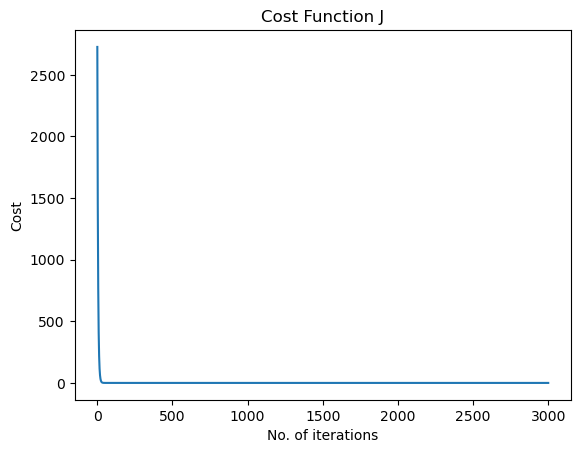

In [295]:
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_costs)
plt.show()

In [296]:
y_pred=x.dot(tht)

rmse_value = np.sqrt(np.mean((y - y_pred) ** 2))
print("Root Mean Squared Error (RMSE):", rmse_value)
print("Accuracy: ", accu(rmse_value))

Root Mean Squared Error (RMSE): 1.1654817852265404
Accuracy:  98.83451821477345


In [297]:
print(np.sqrt(metrics.mean_squared_error(y,y_pred)))

1.1654817852265404


In [298]:
x_axis=dt.year
y_axis=dt.Actual
y1_axis=dt.Predicted
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,y1_axis,color='r')
plt.title("linear regression")

plt.show()

AttributeError: 'DataFrame' object has no attribute 'year'